In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.concat( pd.read_excel("C:/Users/test/Downloads/imus+(2).xlsx" , sheet_name = None),ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/test/Downloads/imus+(2).xlsx'

In [ ]:
df.head()

,category,manufacturer,part_number,sku,alt_sku,description,status,qty,price,sku_create_date
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,NaN,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,NaN,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,NaN,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,NaN,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,NaN,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17


In [ ]:
df.shape

(2627926, 10)

In [ ]:
df.isnull().sum()

category                 0
manufacturer             0
part_number              0
sku                      0
alt_sku            2613442
description              0
status                   0
qty                      0
price                    0
sku_create_date          0
dtype: int64

In [ ]:
df.duplicated(subset='part_number').sum()

2293352

In [ ]:
df.drop(['alt_sku'],axis=1,inplace=True)

In [ ]:
df['part_number'].value_counts()

DP2VGAA              190
DPM-VGAF             185
USB3GIG              182
AEC012018            181
508354               180
                    ... 
26258-M0009            1
900945                 1
5VD82UT#ABA            1
TCH02UF                1
CON-3ROB-MS25024P      1
Name: part_number, Length: 334574, dtype: int64

In [ ]:
df1=df.loc[df['status'] == "In Stock"]
#create a new column 
df1['Profit'] = df1['price'] * df1['qty']

<ipython-input-9-7ebf3a999c57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Profit'] = df1['price'] * df1['qty']


In [ ]:
df2 =df1.groupby('manufacturer')['price'].sum()
df3 = df2.sort_values(ascending=False)
df3.head(5)

manufacturer
SAMSUNG COMMERCIAL LARGE FORMAT       7728859.58
STARTECH.COM                          7266737.29
TRIPP LITE MASTER-POWER               5524203.82
NEC DISPLAY SOLUTION -LARGE FORMAT    4060159.72
CYBERPOWER SYSTEMS USA                3729767.45
Name: price, dtype: float64

In [ ]:
df2 =df1.groupby('manufacturer')['qty'].sum()
df4 = df2.sort_values(ascending=False)
df4.head(5)

manufacturer
STARTECH.COM                       16069681
DELL CSG SERVICE WARRANTIES        13578833
TRIPP LITE CONNECTIVITY             8283765
LOGITECH - COMPUTER ACCESSORIES     8251159
JABRA BUSINESS                      4829490
Name: qty, dtype: int64

### Top Manufacturers with Price , Quantity

In [ ]:
#inner merge
df5 = pd.merge(df4,df3,on='manufacturer')
df5.head()

,qty,price
manufacturer,,
STARTECH.COM,16069681,7266737.29
DELL CSG SERVICE WARRANTIES,13578833,150917.91
TRIPP LITE CONNECTIVITY,8283765,768146.62
LOGITECH - COMPUTER ACCESSORIES,8251159,1005042.67
JABRA BUSINESS,4829490,392963.51


In [ ]:
Piv = df1.pivot_table(index=['part_number','price'],columns = ['sku_create_date'],values='qty',aggfunc=np.sum)
Piv.head()

sku_create_date          2020-08-17  2020-08-18  2020-08-19  2020-08-20  \
part_number      price                                                    
0-00496          59.62         36.0         NaN         NaN         NaN   
0-00498          96.65         10.0         NaN         NaN         NaN   
003-000884-01-OE 384.20        28.0         NaN         NaN         NaN   
                 398.68         2.0         NaN         NaN         NaN   
00385            1.72          13.0         NaN         NaN         NaN   

sku_create_date          2020-08-21  2020-08-24  2020-08-25  2020-08-26  \
part_number      price                                                    
0-00496          59.62          NaN        36.0         NaN         NaN   
0-00498          96.65          NaN         NaN         NaN         NaN   
003-000884-01-OE 384.20         NaN        28.0         NaN         NaN   
                 398.68         NaN         2.0         NaN         NaN   
00385            1.72           NaN        13.0         NaN         NaN   

sku_create_date          2020-08-27  2020-08-28  
part_number      price                           
0-00496          59.62          NaN         NaN  
0-00498          96.65          NaN         NaN  
003-000884-01-OE 384.20         NaN         NaN  
                 398.68         NaN         NaN  
00385            1.72           NaN         NaN

In [ ]:
#nan to zero
Piv.fillna(0,inplace=True)

In [ ]:
#drop all rows where 2020-08-28 is zero
Piv.drop(Piv.loc[Piv['2020-08-28']==0].index,inplace=True)
Piv.head()

sku_create_date    2020-08-17  2020-08-18  2020-08-19  2020-08-20  2020-08-21  \
part_number price                                                               
00394       1.72       2275.0      2028.0         0.0         0.0         0.0   
            1.80        175.0       156.0         0.0         0.0         0.0   
00403       1.72       1599.0         0.0         0.0         0.0         0.0   
            1.80        123.0         0.0         0.0         0.0         0.0   
005357      74.38         0.0         0.0         0.0         0.0         0.0   

sku_create_date    2020-08-24  2020-08-25  2020-08-26  2020-08-27  2020-08-28  
part_number price                                                              
00394       1.72       2028.0         0.0         0.0         0.0      2054.0  
            1.80        156.0         0.0         0.0         0.0       158.0  
00403       1.72       1378.0      1287.0      1326.0         0.0      1365.0  
            1.80        106.0        99.0       102.0         0.0       105.0  
005357      74.38         0.0         0.0      2646.0         0.0      2628.0

In [ ]:
Piv["Total_qty"] = Piv["2020-08-17"] - Piv["2020-08-28"]
#convert price index to a column
Piv.reset_index(inplace=True)
#drop NaN in Total_qty
Piv.dropna(subset=['Total_qty'],inplace=True)
Piv.head()

sku_create_date,part_number,price,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00,Total_qty
0,00394,1.72,2275.0,2028.0,0.0,0.0,0.0,2028.0,0.0,0.0,0.0,2054.0,221.0
1,00394,1.80,175.0,156.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0,158.0,17.0
2,00403,1.72,1599.0,0.0,0.0,0.0,0.0,1378.0,1287.0,1326.0,0.0,1365.0,234.0
3,00403,1.80,123.0,0.0,0.0,0.0,0.0,106.0,99.0,102.0,0.0,105.0,18.0
4,005357,74.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2646.0,0.0,2628.0,-2628.0


In [ ]:
#group by part_number and sum the qty and price
Piv1 = Piv.groupby('part_number')['Total_qty','price'].sum()

<ipython-input-19-54b0c829457e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Piv1 = Piv.groupby('part_number')['Total_qty','price'].sum()


In [ ]:
Piv1["Profit"] = Piv1['Total_qty'] * Piv1['price']

### Most Profitable Products

In [ ]:
#sort by profit
Piv1 = Piv1.sort_values(by=['Profit'],ascending=False)
Piv1.head()

sku_create_date,Total_qty,price,Profit
part_number,,,
84693-01,14472.0,499.41,7227461.52
89434-01,21000.0,199.68,4193280.00
QB43R,3066.0,1358.08,4163873.28
PA03643-B205,6897.0,490.87,3385530.39
84693-11,5340.0,624.30,3333762.00


In [ ]:
pivot = df1.pivot_table(index=['part_number'],columns = ['sku_create_date'],values='price',aggfunc=np.sum)
pivot.head()

sku_create_date,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28
part_number,,,,,,,,,,
0-00496,59.62,NaN,NaN,NaN,NaN,59.62,NaN,NaN,NaN,NaN
0-00498,96.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003-000884-01-OE,5777.48,NaN,NaN,NaN,NaN,5777.48,NaN,NaN,NaN,NaN
00385,24.16,NaN,NaN,NaN,NaN,24.16,NaN,NaN,NaN,NaN
00388,33.29,NaN,NaN,NaN,NaN,33.29,NaN,NaN,NaN,NaN


In [ ]:
pivot.groupby('part_number')
pivot.fillna(0,inplace=True)

In [ ]:
pivot["New"] = pivot["2020-08-17"] - pivot["2020-08-18"] - pivot["2020-08-19"] - pivot["2020-08-20"] - pivot["2020-08-21"] -  pivot["2020-08-24"] - pivot["2020-08-25"] - pivot["2020-08-26"] - pivot["2020-08-27"] - pivot["2020-08-28"]

### Products decreasing price

In [ ]:
pivot3 = pivot["New"]
#drop 0 values
pivot3.drop(pivot3[pivot3 == 3].index,inplace=True)
pivot3.sort_values(ascending=False).head(5)

part_number
75UH5E-B    65342.16
OL6KRT      44037.82
04030794    30146.05
65UH5E-B    29259.90
OM46N       28703.32
Name: New, dtype: float64

### Products increasing price

In [ ]:
pivot3.sort_values(ascending=True).head(5)

part_number
C981Q   -1076777.10
QM98N    -611576.56
QB98R    -557150.36
OH55F    -549619.00
C861Q    -468924.36
Name: New, dtype: float64

### Top category by Price and Quintity

In [ ]:
df5 = df1.groupby('category')['Profit'].sum()
df5.sort_values(ascending=False).head(1)

category
1221    4.377736e+09
Name: Profit, dtype: float64

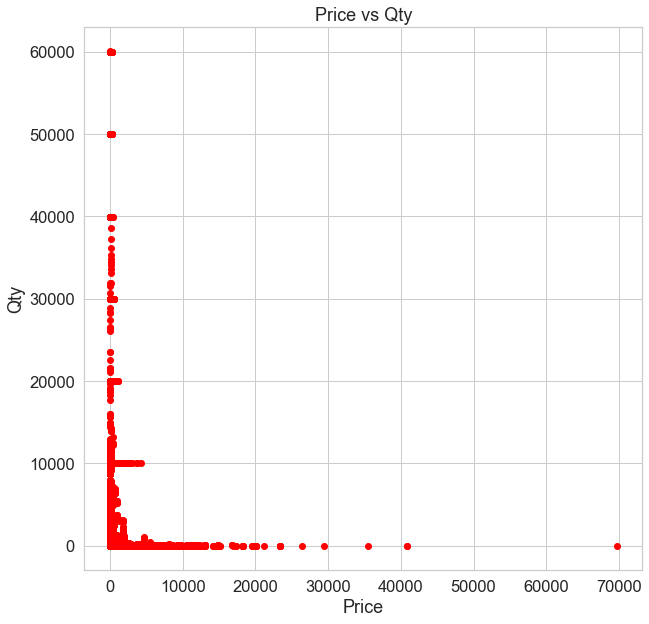

In [ ]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,10))
plt.scatter(df1['price'],df1['qty'],color='red')
plt.xlabel('Price')
plt.ylabel('Qty')
plt.title('Price vs Qty')
plt.show()

In [ ]:
df1['sku_create_date'].value_counts()

2020-08-24    159912
2020-08-17    158662
2020-08-26     54901
2020-08-20     51277
2020-08-21     51249
2020-08-25     50754
2020-08-18     48778
2020-08-27     46815
2020-08-28     46317
2020-08-19     45123
Name: sku_create_date, dtype: int64

In [ ]:
df6=df1.loc[df1['sku_create_date'] == "2020-08-17"]
df7=df1.loc[df1['sku_create_date'] == "2020-08-28"]

In [ ]:
df8 = df6.groupby(['part_number'])['qty'].sum()
df8.sort_values( ascending=False).head(5)

part_number
FEE SKU       1811683
920-002565     196129
920-002478     185827
860-09         122544
B2B145-BLK     102564
Name: qty, dtype: int64

In [ ]:
df9 = df7.groupby(['part_number'])['qty'].sum()
df9.sort_values( ascending=False).head(5)

part_number
920-002565      206618
920-002478      147424
860-09          117738
B2B145-BLK       92034
VA2446MH-LED     74746
Name: qty, dtype: int64

In [ ]:
#inner merge
df10 = pd.merge(df8,df9,how='inner',on='part_number')
df10.head()

,qty_x,qty_y
part_number,,
00394,2450,2212
00403,1722,1470
005357,2808,2628
005361,1260,774
005365,14598,11682


In [ ]:
#new column (qty_x - qty_y)**2
df10['sells'] = (df10['qty_x'] - df10['qty_y'])**2

### Products which are Aging

In [ ]:
df11 = df10.groupby(['part_number'])['sells'].sum()
df11.sort_values( ascending=False).tail(5)


part_number
01253-001       0
JL260A#ABA      0
UM.CV6AA.B02    0
JH336A          0
10007008        0
Name: sells, dtype: int64

We can see that , the sells of these products are very less from 17th to 28th ,i.e, zero.That means from starting date the sells of these products are not happening due to certain reasons.So we can simply try to decrease price of these items to increase the sells and reduce these high stocks.

# For Nostock

In [ ]:
df_nostock = df.loc[df['status'] == "No Stock"]
df_nostock.head()

,category,manufacturer,part_number,sku,description,status,qty,price,sku_create_date
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17


In [ ]:
df12 =df_nostock.groupby('manufacturer')['price'].sum()
df13 = df12.sort_values(ascending=False)
df13.head(5)

manufacturer
CISCO - CCW MULTI YEAR        7.122571e+08
ALTNET                        3.154831e+08
CISCO - CISCO CCW SERVICES    3.016035e+08
CITRIX - NETSCALER            2.691865e+08
FORCEPOINT SOFTWARE           2.185683e+08
Name: price, dtype: float64

In [ ]:
df14 =df_nostock.groupby('manufacturer')['qty'].sum()
df15 = df14.sort_values(ascending=False)
df15.head()

manufacturer
22MILES                          0
PHOENIX AUDIO TECHNOLOGIES       0
PANASONIC PANABOARDS             0
PANASONIC FLAT PANEL DISPLAYS    0
PANASONIC CTO                    0
Name: qty, dtype: int64

### Top Manufacturers with Price , Quantity

In [ ]:
#inner merge
Top = pd.merge(df13,df15,on='manufacturer')
Top.head()

,price,qty
manufacturer,,
CISCO - CCW MULTI YEAR,7.122571e+08,0
ALTNET,3.154831e+08,0
CISCO - CISCO CCW SERVICES,3.016035e+08,0
CITRIX - NETSCALER,2.691865e+08,0
FORCEPOINT SOFTWARE,2.185683e+08,0


In [ ]:
Pi = df1.pivot_table(index=['part_number','price'],columns = ['sku_create_date'],values='qty',aggfunc=np.sum)
Pi.head()

sku_create_date          2020-08-17  2020-08-18  2020-08-19  2020-08-20  \
part_number      price                                                    
0-00496          59.62         36.0         NaN         NaN         NaN   
0-00498          96.65         10.0         NaN         NaN         NaN   
003-000884-01-OE 384.20        28.0         NaN         NaN         NaN   
                 398.68         2.0         NaN         NaN         NaN   
00385            1.72          13.0         NaN         NaN         NaN   

sku_create_date          2020-08-21  2020-08-24  2020-08-25  2020-08-26  \
part_number      price                                                    
0-00496          59.62          NaN        36.0         NaN         NaN   
0-00498          96.65          NaN         NaN         NaN         NaN   
003-000884-01-OE 384.20         NaN        28.0         NaN         NaN   
                 398.68         NaN         2.0         NaN         NaN   
00385            1.72           NaN        13.0         NaN         NaN   

sku_create_date          2020-08-27  2020-08-28  
part_number      price                           
0-00496          59.62          NaN         NaN  
0-00498          96.65          NaN         NaN  
003-000884-01-OE 384.20         NaN         NaN  
                 398.68         NaN         NaN  
00385            1.72           NaN         NaN

In [ ]:
#nan to zero
Pi.fillna(0,inplace=True)

In [ ]:
Pi.loc[Pi['2020-08-28']==0]

sku_create_date           2020-08-17  2020-08-18  2020-08-19  2020-08-20  \
part_number      price                                                     
0-00496          59.62          36.0         0.0         0.0         0.0   
0-00498          96.65          10.0         0.0         0.0         0.0   
003-000884-01-OE 384.20         28.0         0.0         0.0         0.0   
                 398.68          2.0         0.0         0.0         0.0   
00385            1.72           13.0         0.0         0.0         0.0   
...                              ...         ...         ...         ...   
ZT62062-T01A100Z 4001.17         1.0         0.0         0.0         0.0   
ZT62063-T010100Z 3797.41        11.0         0.0         0.0         0.0   
ZT62063-T01A100Z 4140.69        10.0         0.0         0.0         0.0   
ZT62063-T110100Z 4344.44         6.0         0.0         0.0         0.0   
ZUCUBJCK         16.74           2.0         0.0         0.0         0.0   

sku_create_date           2020-08-21  2020-08-24  2020-08-25  2020-08-26  \
part_number      price                                                     
0-00496          59.62           0.0        36.0         0.0         0.0   
0-00498          96.65           0.0         0.0         0.0         0.0   
003-000884-01-OE 384.20          0.0        28.0         0.0         0.0   
                 398.68          0.0         2.0         0.0         0.0   
00385            1.72            0.0        13.0         0.0         0.0   
...                              ...         ...         ...         ...   
ZT62062-T01A100Z 4001.17         0.0         1.0         0.0         0.0   
ZT62063-T010100Z 3797.41         0.0        19.0        21.0         0.0   
ZT62063-T01A100Z 4140.69         0.0        10.0         0.0         0.0   
ZT62063-T110100Z 4344.44         0.0         6.0         0.0         0.0   
ZUCUBJCK         16.74           0.0         2.0         0.0         0.0   

sku_create_date           2020-08-27  2020-08-28  
part_number      price                            
0-00496          59.62           0.0         0.0  
0-00498          96.65           0.0         0.0  
003-000884-01-OE 384.20          0.0         0.0  
                 398.68          0.0         0.0  
00385            1.72            0.0         0.0  
...                              ...         ...  
ZT62062-T01A100Z 4001.17         0.0         0.0  
ZT62063-T010100Z 3797.41         0.0         0.0  
ZT62063-T01A100Z 4140.69         0.0         0.0  
ZT62063-T110100Z 4344.44         0.0         0.0  
ZUCUBJCK         16.74           0.0         0.0  

[37697 rows x 10 columns]

In [ ]:
Pi["Total_qty"] = Pi['2020-08-17'] - Pi['2020-08-28']

In [ ]:
Pi.reset_index(inplace=True)
Pi.head()

sku_create_date,part_number,price,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00,Total_qty
0,0-00496,59.62,36.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,36.0
1,0-00498,96.65,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,003-000884-01-OE,384.20,28.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,28.0
3,003-000884-01-OE,398.68,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
4,00385,1.72,13.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,13.0


In [ ]:
#group by part_number and sum the qty and price
Pi1 = Pi.groupby('part_number')['Total_qty','price'].sum()

<ipython-input-44-c7f95c0b851a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Pi1 = Pi.groupby('part_number')['Total_qty','price'].sum()


In [ ]:
Pi1["Profit"] = Pi1["Total_qty"] * Pi1["price"]

### Most Profitable Products

In [ ]:
Pi1.sort_values(by=['Profit'],ascending=False)
#drop sku_create_date
Pi1.drop(Pi1.columns[0],axis=1,inplace=True)
Pi1.head()

sku_create_date,price,Profit
part_number,,
0-00496,59.62,2146.32
0-00498,96.65,966.50
003-000884-01-OE,782.88,23486.40
00385,3.52,49.28
00388,4.85,67.90


In [ ]:
#groupby part_number
df16 = df_nostock.groupby('part_number')['price'].sum()
df16.sort_values( ascending=False).head(5)


part_number
ALT-TPM-240000000     1.699491e+08
ALT-TPM-80000000      5.664969e+07
SV5-SWA-JCE-1KGBPS    2.089800e+07
CON-3ECMU-LTCLX3UL    2.086371e+07
CON-3ECMU-LTCAEEX3    1.987020e+07
Name: price, dtype: float64

In [ ]:
pivot1 = df_nostock.pivot_table(index=['part_number'],columns = ['sku_create_date'],values='price',aggfunc=np.sum)

In [ ]:
#sort the values in the pivot table
pivot1.sort_values(by = '2020-08-17',ascending=False,inplace=True)

In [ ]:
#groupby part_number of pivot1
df17 = pivot1.groupby('part_number')


In [ ]:
#conver nan to 0
pivot1.fillna(0,inplace=True)

In [ ]:
pivot1["New"] = pivot1["2020-08-17"] - pivot1["2020-08-18"] - pivot1["2020-08-19"] - pivot1["2020-08-20"] - pivot1["2020-08-21"] -  pivot1["2020-08-24"] - pivot1["2020-08-25"] - pivot1["2020-08-26"] - pivot1["2020-08-27"] - pivot1["2020-08-28"]
pivot1

sku_create_date,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00,New
part_number,,,,,,,,,,,
ALT-TPM-240000000,84974533.10,0.0,0.00,0.0,0.00,84974533.10,0.0,0.0,0.0,0.0,0.00
ALT-TPM-80000000,28324844.37,0.0,0.00,0.0,0.00,28324844.37,0.0,0.0,0.0,0.0,0.00
SV5-SWA-JCE-1KGBPS,10449000.00,0.0,0.00,0.0,0.00,10449000.00,0.0,0.0,0.0,0.0,0.00
CON-3ECMU-LTCLX3UL,8521380.00,0.0,0.00,0.0,0.00,8521380.00,3820950.0,0.0,0.0,0.0,-3820950.00
CON-3ECMU-LTCAEEX3,8115600.00,0.0,0.00,0.0,0.00,8115600.00,3639000.0,0.0,0.0,0.0,-3639000.00
...,...,...,...,...,...,...,...,...,...,...,...
ZT61046-T010200Z,0.00,0.0,3418.22,0.0,3418.22,0.00,0.0,0.0,0.0,0.0,-6836.44
ZVC300-C0-A00,0.00,0.0,0.00,0.0,1494.19,0.00,0.0,0.0,0.0,0.0,-1494.19
ZVC500-C0-A00,0.00,0.0,0.00,0.0,1814.37,0.00,0.0,0.0,0.0,0.0,-1814.37


### Products in decreasing price

In [ ]:
pivot2 = pivot1["New"]
#drop 0 values
pivot2.drop(pivot2[pivot2 == 0].index,inplace=True)
pivot2.sort_values(ascending=False).head(5)

part_number
SUP-SX6536-5G       284411.21
65EV5C-2.AKRLLHX    199656.42
SUP-SX6536-5GP      199087.43
SUP-SX6518-5G       147276.30
SUP-SX6536-5S       142205.60
Name: New, dtype: float64

### Products  in increasing price

In [ ]:
pivot2.sort_values(ascending=True).head(5)

part_number
CON-3ECMU-LTCLX3UL   -3820950.00
CON-3ECMU-LTCAEEX3   -3639000.00
CON-3ECMU-LPHOME6S   -3119143.38
CON-3ECMU-LTCACLM3   -1910475.00
CON-3ECMU-OFUL6OBL   -1910475.00
Name: New, dtype: float64

### Top Category by Price And Quantity

In [ ]:
df_nostock5 = df_nostock.groupby('category')['price'].sum()
df_nostock5.sort_values(ascending=False).head(1)

category
1221    1.539977e+09
Name: price, dtype: float64

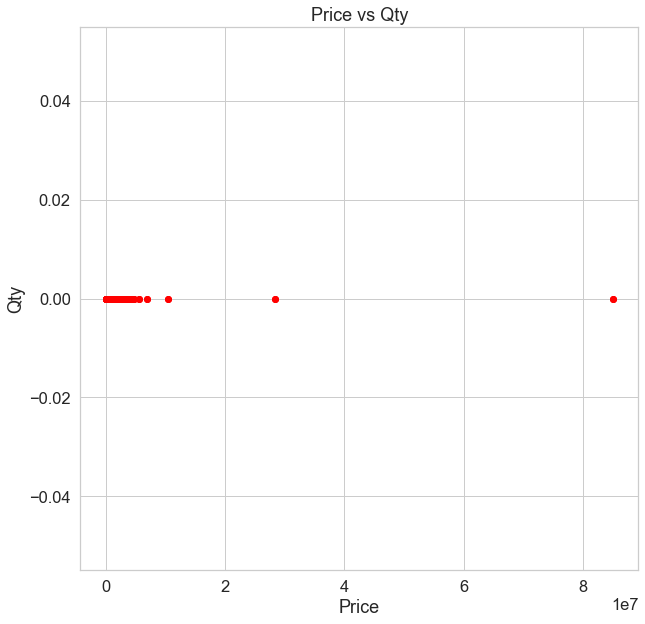

In [ ]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,10))
plt.scatter(df_nostock['price'],df_nostock['qty'],color='red')
plt.xlabel('Price')
plt.ylabel('Qty')
plt.title('Price vs Qty')
plt.show()